In [87]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
import dexplot as dxp
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

In [2]:
drugs = pd.read_csv("drugs_reduced_reduced.csv")
drugs["rating"] = drugs["rating"].astype("int")
druglib = drugs[~drugs.effectiveness.isnull()]
drugcom = drugs[~drugs.effectiveness.isnull()]

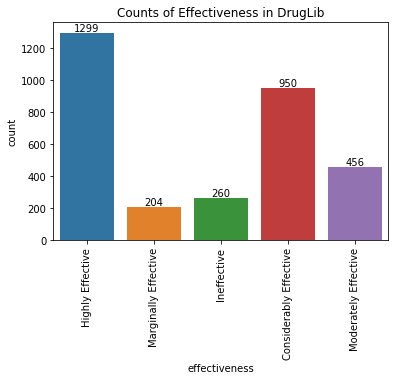

In [3]:
ax = sns.countplot(drugs["effectiveness"]);
ax.set_xticklabels(ax.xaxis.get_majorticklabels(), rotation = 90);
for patch in ax.patches: 
    x = patch.get_bbox().get_points()[:, 0]
    y = patch.get_bbox().get_points()[1, 1]
    ax.annotate(f'{int(y)}', (x.mean(), y), ha = "center", va = "bottom")
plt.title("Counts of Effectiveness in DrugLib");

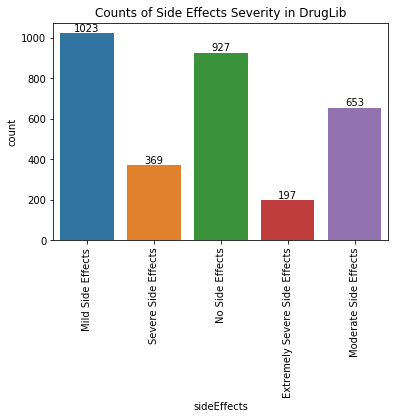

In [4]:
ax = sns.countplot(drugs["sideEffects"]);
ax.set_xticklabels(ax.xaxis.get_majorticklabels(), rotation = 90);
for patch in ax.patches: 
    x = patch.get_bbox().get_points()[:, 0]
    y = patch.get_bbox().get_points()[1, 1]
    ax.annotate(f'{int(y)}', (x.mean(), y), ha = "center", va = "bottom")
plt.title("Counts of Side Effects Severity in DrugLib");

In [5]:
drugs["effectiveness"].unique()

array(['Highly Effective', 'Marginally Effective', 'Ineffective',
       'Considerably Effective', 'Moderately Effective', nan],
      dtype=object)

In [6]:
druglib.size

47535

In [47]:
ax.patches

In [58]:
[patch.get_bbox().get_points()[0, 0] for patch in ax.patches[0:10]]

[1.0,
 1.8999999999999997,
 2.8,
 3.7000000000000006,
 4.6,
 5.5,
 6.4,
 7.300000000000001,
 8.2,
 9.100000000000001]

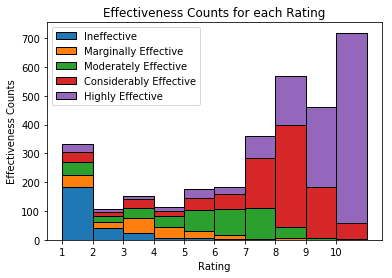

In [62]:
pd.DataFrame({"Ineffective": druglib.groupby("effectiveness").get_group("Ineffective").rating,
              "Marginally Effective": druglib.groupby("effectiveness").get_group("Marginally Effective").rating,
              "Moderately Effective": druglib.groupby("effectiveness").get_group("Moderately Effective").rating, 
              "Considerably Effective": druglib.groupby("effectiveness").get_group("Considerably Effective").rating, 
              "Highly Effective": druglib.groupby("effectiveness").get_group("Highly Effective").rating}).plot.hist(stacked = True, edgecolor = "black");
ax = plt.gca()
ax.set_xticks([patch.get_bbox().get_points()[0, 0] for patch in ax.patches[0:10]]);
ax.set_xticklabels([1, 2, 3, 4, 5, 6, 7, 8, 9, 10]);
plt.xlabel("Rating");
plt.ylabel("Effectiveness Counts") ;
plt.title("Effectiveness Counts for each Rating");

In [70]:
druglib["rating2"][0]

Interval(3, 4, closed='right')

C:\Users\Jordan Fan\Anaconda3\envs\stat159\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


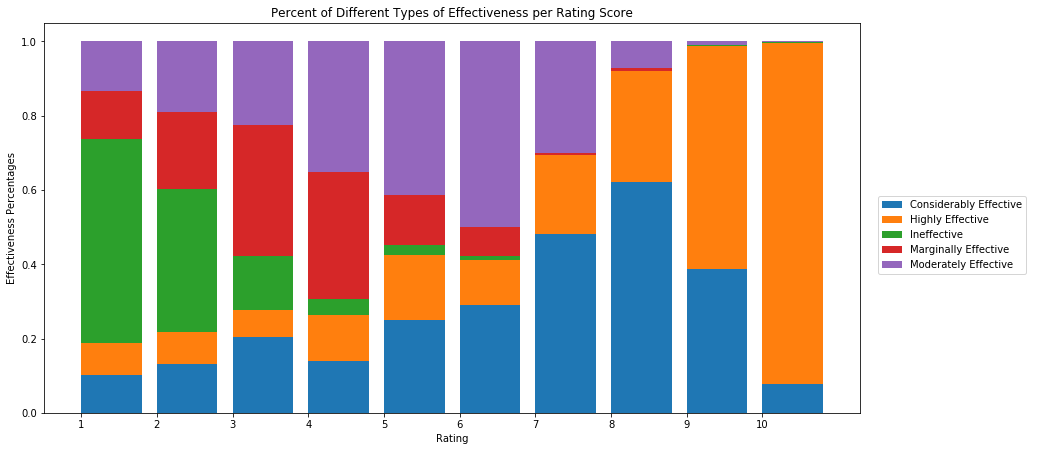

In [80]:
druglib["rating2"] = pd.cut(druglib["rating"], range(0, 11, 1))
dxp.aggplot(agg = "rating2", data = druglib, hue = "effectiveness", stacked = True, normalize = "rating2");
ax = plt.gca()
ax.set_xticks([patch.get_bbox().get_points()[0, 0] for patch in ax.patches[0:10]]);
ax.set_xticklabels([1, 2, 3, 4, 5, 6, 7, 8, 9, 10]);
plt.xlabel("Rating");
plt.ylabel("Effectiveness Percentages");
plt.title("Percent of Different Types of Effectiveness per Rating Score");

In [81]:
druglib.sideEffects.unique()

array(['Mild Side Effects', 'Severe Side Effects', 'No Side Effects',
       'Extremely Severe Side Effects', 'Moderate Side Effects'],
      dtype=object)

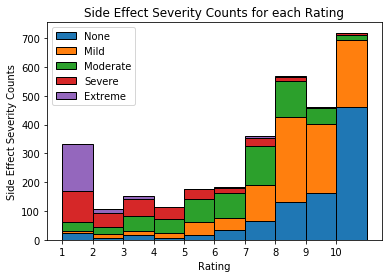

In [84]:
pd.DataFrame({"None": druglib.groupby("sideEffects").get_group("No Side Effects").rating,
              "Mild": druglib.groupby("sideEffects").get_group("Mild Side Effects").rating,
              "Moderate": druglib.groupby("sideEffects").get_group("Moderate Side Effects").rating, 
              "Severe": druglib.groupby("sideEffects").get_group("Severe Side Effects").rating, 
              "Extreme": druglib.groupby("sideEffects").get_group("Extremely Severe Side Effects").rating}).plot.hist(stacked = True, edgecolor = "black");
ax = plt.gca()
ax.set_xticks([patch.get_bbox().get_points()[0, 0] for patch in ax.patches[0:10]]);
ax.set_xticklabels([1, 2, 3, 4, 5, 6, 7, 8, 9, 10]);
plt.xlabel("Rating");
plt.ylabel("Side Effect Severity Counts") ;
plt.title("Side Effect Severity Counts for each Rating");

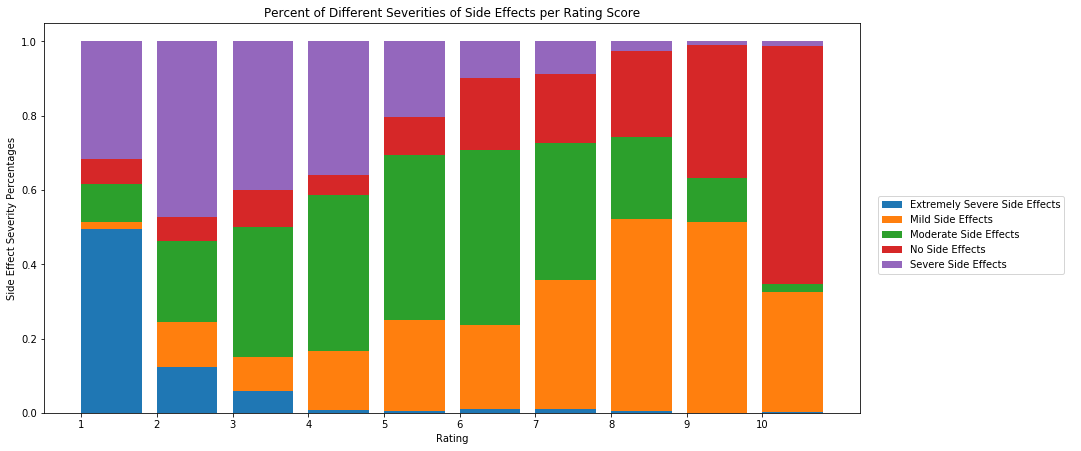

In [85]:
dxp.aggplot(agg = "rating2", data = druglib, hue = "sideEffects", stacked = True, normalize = "rating2");
ax = plt.gca()
ax.set_xticks([patch.get_bbox().get_points()[0, 0] for patch in ax.patches[0:10]]);
ax.set_xticklabels([1, 2, 3, 4, 5, 6, 7, 8, 9, 10]);
plt.xlabel("Rating");
plt.ylabel("Side Effect Severity Percentages");
plt.title("Percent of Different Severities of Side Effects per Rating Score");

In [89]:
drug_2 = pd.read_csv("Final_Data.csv")
drug_2["rating2"] = pd.cut(drug_2["rating"], range(0, 11, 1))


C:\Users\Jordan Fan\Anaconda3\envs\stat159\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


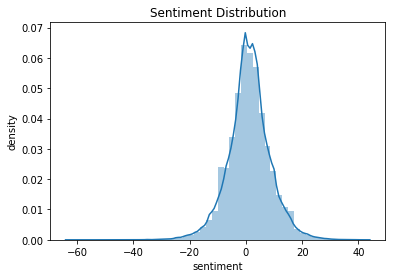

In [94]:
sns.distplot(drug_2["sentiment"]);
plt.ylabel("density")
plt.title("Sentiment Distribution");

Text(0.5,1,'Distribution of Review Sentiment for each Effectiveness Category')

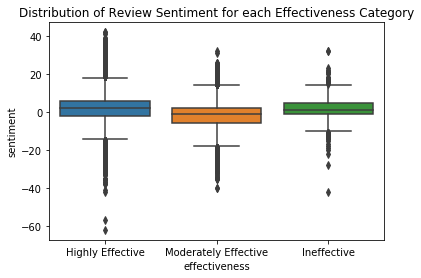

In [96]:
sns.boxplot(x = "effectiveness", y = "sentiment", data = drug_2);
plt.title("Distribution of Review Sentiment for each Effectiveness Category")

Text(0.5,1,'Distribution of Review Sentiment for each Side Effect Category')

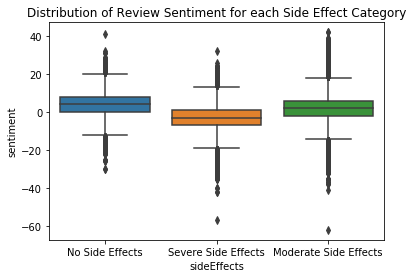

In [98]:
sns.boxplot(x = "sideEffects", y = "sentiment", data = drug_2);
plt.title("Distribution of Review Sentiment for each Side Effect Category")